In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from analysis import datasets
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df = datasets.load_entsoe()
df.index.min(), df.index.max()


(Timestamp('2017-01-01 00:00:00'), Timestamp('2024-12-31 23:45:00'))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 280544 entries, 2017-01-01 00:00:00 to 2024-12-31 23:45:00
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   offshore  271836 non-null  float64
 1   onshore   271836 non-null  float64
dtypes: float64(2)
memory usage: 6.4 MB


In [4]:
df.describe()

,offshore,onshore
count,271836.000000,271836.000000
mean,397.991767,3849.812810
std,354.795808,3425.099386
min,0.000000,0.000000
25%,87.000000,1155.000000
50%,302.000000,2751.500000
75%,660.000000,5612.000000
max,1480.000000,16676.000000


C:\Users\Manuel\AppData\Local\Temp\ipykernel_3036\887830866.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').mean().plot()


<Axes: xlabel='time'>

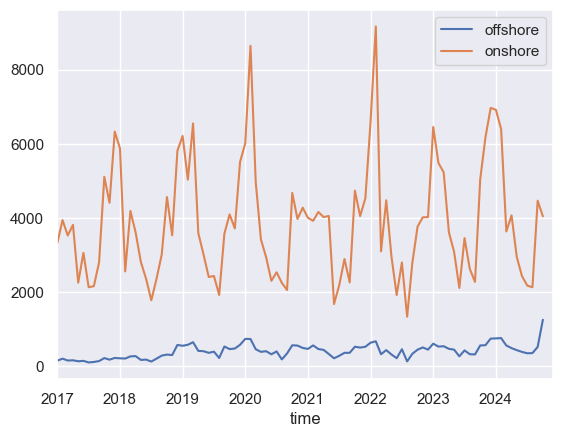

In [25]:
df.resample('M').mean().plot()

In [20]:
np.correlate(df2.onshore, df2.onshore.shift(1))

array([nan])

In [35]:
[(x, df.resample('M').mean().onshore.autocorr(lag=x).item()) for x in range(1,13)]

C:\Users\Manuel\AppData\Local\Temp\ipykernel_3036\2439084807.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  [(x, df.resample('M').mean().onshore.autocorr(lag=x).item()) for x in range(1,13)]


[(1, 0.5594572065738643),
 (2, 0.31965788061960393),
 (3, 0.024620842946921205),
 (4, -0.3220165040758755),
 (5, -0.5177531945313788),
 (6, -0.5990263228833668),
 (7, -0.5749526733076068),
 (8, -0.34983740497058896),
 (9, 0.06211915250798147),
 (10, 0.24161417942686558),
 (11, 0.5103913983762826),
 (12, 0.5948854490644635)]

C:\Users\Manuel\AppData\Local\Temp\ipykernel_3036\636422414.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.plotting.autocorrelation_plot(df.resample('M').mean().offshore)


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

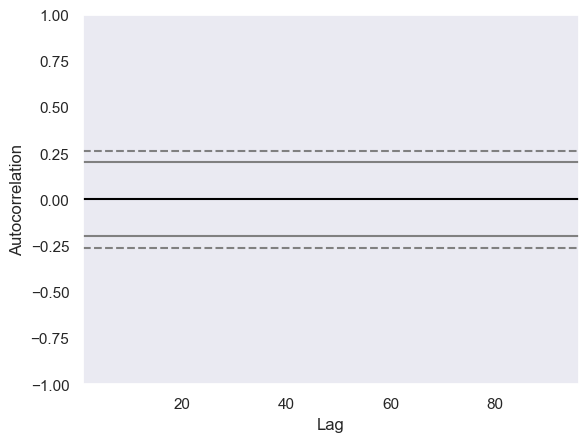

In [24]:
pd.plotting.autocorrelation_plot(df.resample('M').mean().offshore)

In [6]:
sns.set_theme()

In [11]:
# Plot the data
#df.plot(title="Time Series Data")
df2 = df.resample('D').mean()
column = "onshore"
# 1. Autocorrelation and Partial Autocorrelation to detect periodicity
lag_acf = acf(df2[column], nlags=40)
lag_pacf = pacf(df2[column], nlags=40)
display(lag_acf)
display(lag_pacf)

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan])

array([ 1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan])

In [ ]:
# 2. Fit an ARMA model to the data (ARMA(p,q) model)
model = ARIMA(df[column], order=(2, 0, 2))  # ARMA is a special case of ARIMA(p, 0, q)
arma_model = model.fit()

# Print the summary of the fitted model
print(arma_model.summary())

# 3. Analyze the residuals to check for periodicity in the residuals
residuals = arma_model.resid

plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals of ARMA Model')
plt.show()

In [ ]:
# 4. Optionally, use FFT to find periodicity
fft_vals = np.fft.fft(df[column])
fft_freq = np.fft.fftfreq(len(fft_vals))

plt.figure(figsize=(10, 4))
plt.plot(fft_freq, np.abs(fft_vals))
plt.title('Frequency Spectrum')
plt.show()

In [9]:
lag_acf

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan])

In [10]:
lag_pacf

array([ 1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan])

<Axes: >

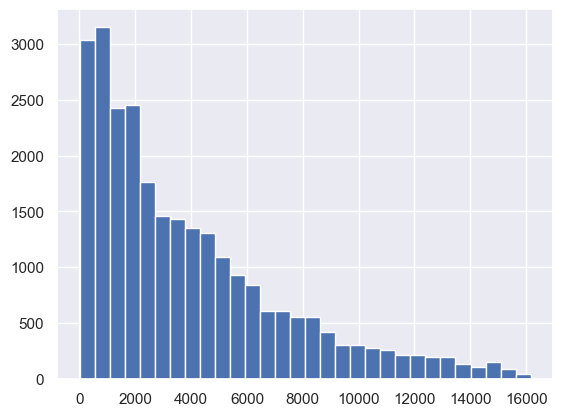

In [34]:
df.onshore.hist(bins=30)

<Axes: >

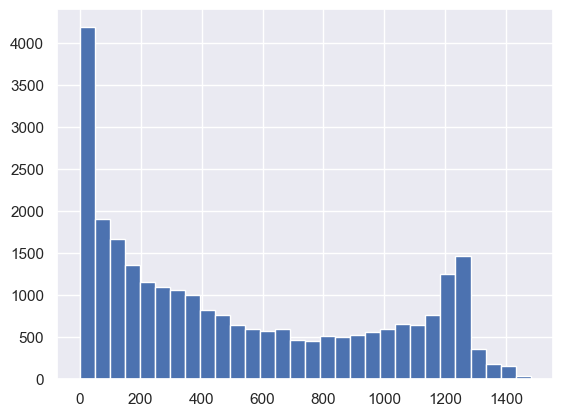

In [35]:
df.offshore.hist(bins=30)

<Axes: xlabel='onshore', ylabel='Density'>

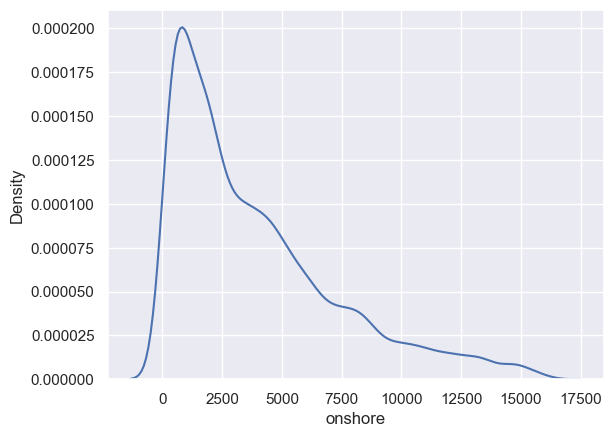

In [33]:
sns.kdeplot(df.onshore)

<Axes: xlabel='offshore', ylabel='Density'>

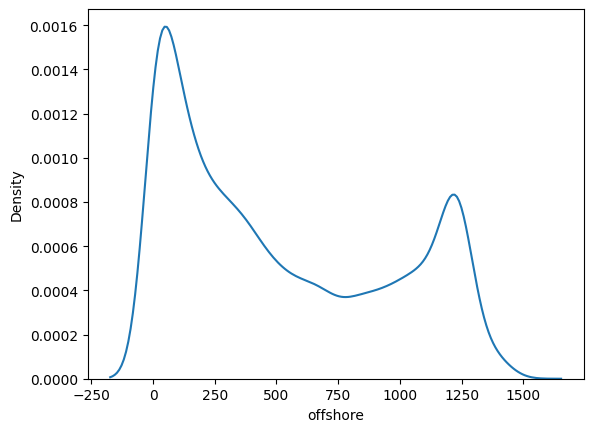

In [28]:
sns.kdeplot(df.offshore)

In [6]:
df.Area.unique()

array(['CTA|DE(50Hertz)'], dtype=object)